## Importing Libraries and Setup

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# creating path variable
path = r'/Users/paigepearson/Desktop/Data Analytics/Immersion Course/Achievement 4/Instacart Basket Analysis'

In [3]:
# importing dataframe
ords_prods_merge = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'orders_products_merged_updated2.pkl'))

<Axes: >

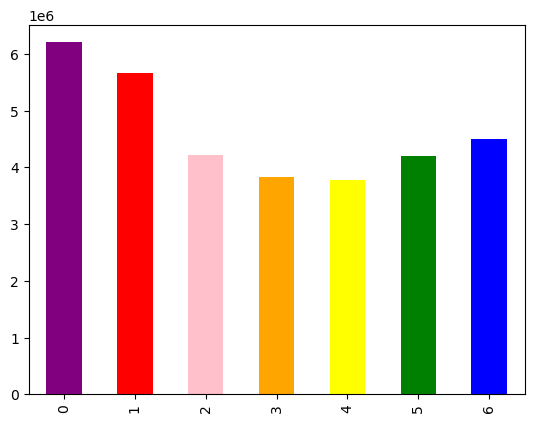

In [4]:
# creating a bar chart
ords_prods_merge['order_day_of_week'].value_counts().sort_index().plot.bar(color = ['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

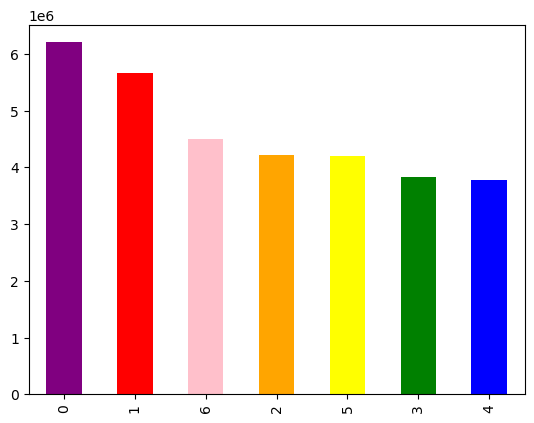

In [5]:
# creating bar chart variable
bar = ords_prods_merge['order_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [6]:
# exporting the bar chart
bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_orders_dow.png'))

<Axes: ylabel='Frequency'>

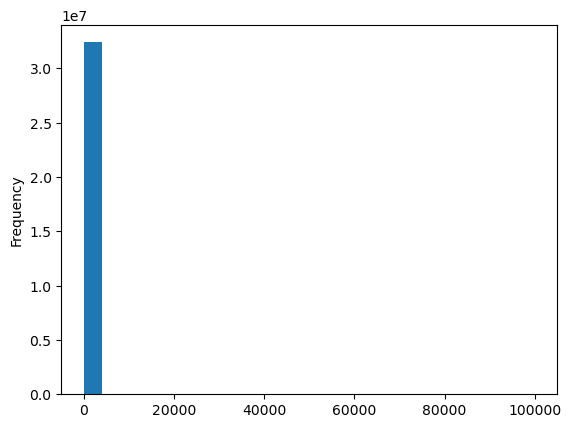

In [7]:
#creating a histogram
ords_prods_merge['prices'].plot.hist(bins = 25)

In [8]:
ords_prods_merge['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [9]:
ords_prods_merge['prices'].mean()

11.980225638383454

In [10]:
ords_prods_merge['prices'].median()

7.4

In [11]:
ords_prods_merge['prices'].max()

99999.0

<Axes: xlabel='prices', ylabel='prices'>

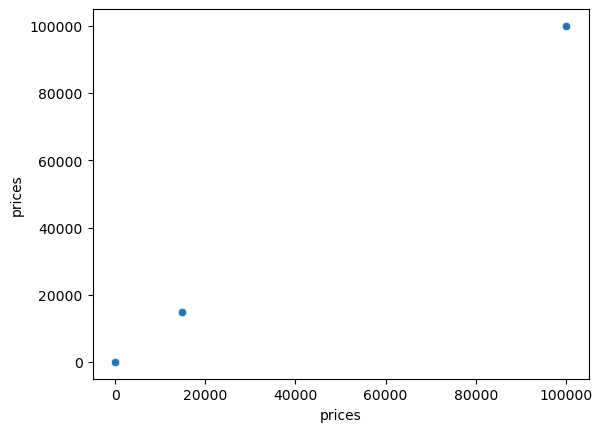

In [12]:
#creating a scatterplot to check the distribution of data points
sns.scatterplot(x = 'prices', y = 'prices', data = ords_prods_merge)

In [13]:
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,order_id,user_id,eval_set,order_number,order_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spent,spending_flag,median_orders,order_frequency_flag
10030345,912404,17,prior,12,2,14,5.0,21553,5,0,...,High-range,Regularly busy,Regular days,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
10030346,603376,17,prior,22,6,16,4.0,21553,3,1,...,High-range,Regularly busy,Regular days,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
10030347,3264360,135,prior,2,2,21,13.0,21553,6,0,...,High-range,Regularly busy,Regular days,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
10030348,892534,135,prior,3,0,8,12.0,21553,3,1,...,High-range,Busiest day,Busiest days,Most orders,4,New customer,1154.792308,High spender,12.0,Regular customer
10030349,229704,342,prior,8,1,19,30.0,21553,9,0,...,High-range,Regularly busy,Busiest days,Most orders,16,Regular customer,114.426619,High spender,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29166209,2249946,204099,prior,29,0,8,4.0,33664,1,0,...,High-range,Busiest day,Busiest days,Most orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
29166210,2363282,204099,prior,31,0,9,2.0,33664,1,1,...,High-range,Busiest day,Busiest days,Most orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
29166211,3181945,204395,prior,13,3,15,8.0,33664,25,0,...,High-range,Regularly busy,Slowest days,Most orders,15,Regular customer,451.153540,High spender,5.0,Frequent customer
29166212,2486215,205227,prior,7,3,20,4.0,33664,8,0,...,High-range,Regularly busy,Slowest days,Average orders,12,Regular customer,1178.381871,High spender,12.0,Regular customer


In [14]:
# marking the unusual prices as NaNs to easily exclude them from your findings
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [15]:
# checking work
ords_prods_merge['prices'].max()

25.0

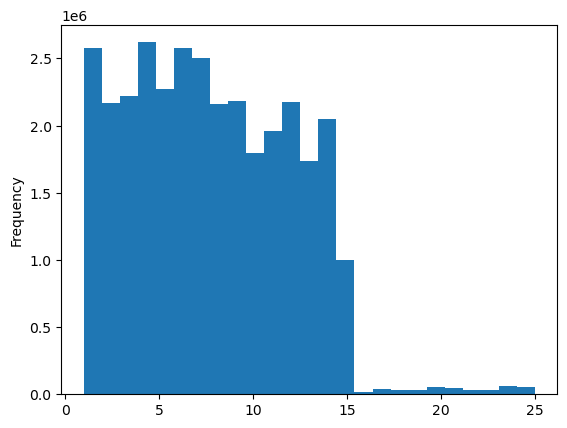

In [16]:
# creating a histogram after dealing with the extreme prices
hist = ords_prods_merge['prices'].plot.hist(bins = 25)

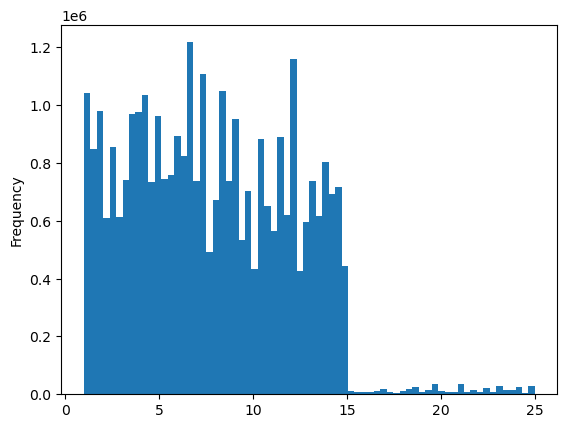

In [17]:
# making a second histogram with an increased level of granularity
hist_2 = ords_prods_merge['prices'].plot.hist(bins = 70)

In [18]:
# create a list holding true/false values to the test np.random.rant() <= 0.7
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [19]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [20]:
np.random.rand(10)

array([0.93546686, 0.06557465, 0.85698584, 0.24456371, 0.22683171,
       0.17068366, 0.27008946, 0.52534234, 0.83151571, 0.78153402])

In [21]:
# store 70% of the sample in the dataframe big
big = ords_prods_merge[dev]

In [22]:
# store 30% of the sample in the dataframe small
small = ords_prods_merge[~dev]

In [23]:
#checking work
len(ords_prods_merge)

32404859

In [24]:
len(big) + len(small)

32404859

In [25]:
# creating a smaller dataframe using only the data needed for the upcoming line chart
df_2 = small[['order_day_of_week', 'prices']]

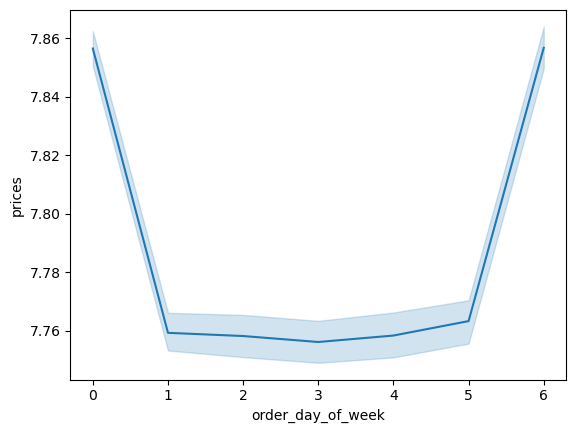

In [26]:
# creating line chart
line = sns.lineplot(data = df_2, x = 'order_day_of_week', y = 'prices')